In [1]:
%matplotlib inline
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import katarchive

import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [4]:
katarchive.product_filter.only_ar1()

begin="01/11/2016"
end="31/11/2016"  

In [5]:
def channels(details):
    ch32k="32768"
    mode="4k" # default
    if ch32k in details:
        mode="32k"
    return mode


In [6]:
print katarchive.search_archive(startdate=begin,enddate=end)


Searched using: CAS.ProductTypeName:(MeerKATAR1TelescopeProduct) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-10-31T22:00:00Z TO 2016-11-30T21:59:59Z]
Returning 358 results
[['1480460408.h5', '2016-11-30 01:00:11 SAST', 'AR1', 32707268445], ['1480459808.h5', '2016-11-30 00:50:12 SAST', 'AR1', 607139905], ['1480424409.h5', '2016-11-29 15:00:12 SAST', 'Tom', 46391969015], ['1480423665.h5', '2016-11-29 14:47:48 SAST', 'Fannie', 467991928], ['1480423325.h5', '2016-11-29 14:42:09 SAST', 'Fannie', 459564882], ['1480422817.h5', '2016-11-29 14:33:40 SAST', 'Fannie', 492726431], ['1480422097.h5', '2016-11-29 14:22:55 SAST', 'sarah', 957054862], ['1480421358.h5', '2016-11-29 14:10:50 SAST', 'sarah', 953826136], ['1480420904.h5', '2016-11-29 14:01:48 SAST', 'AR1', 665052248], ['1480420239.h5', '2016-11-29 13:51:05 SAST', 'sarah', 944804568], ['1480419541.h5', '2016-11-29 13:39:55 SAST', 'sarah', 947659548], ['1480419054.h5', '2016-11-29 13:30:57 SAST', 'AR1', 703484957], ['148041830

In [7]:
f = katarchive.search_archive(startdate=begin,enddate=end)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(MeerKATAR1TelescopeProduct) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2016-10-31T22:00:00Z TO 2016-11-30T21:59:59Z]
Returning 358 results


In [8]:
#print 'First file in run: ' , start.isoformat()
#print 'Last file in run: ' , end.isoformat()


In [9]:
f.sort(key=lambda k: k.metadata.StartTime)

In [10]:
for fi in f:
    txts=fi.metadata.InstructionSet
    #p=findproj(txts)
    print fi.metadata.ExperimentID, np.round(fi.metadata.Duration/3600.,2),"hrs",\
    len(fi.metadata.Antennas),channels(fi.metadata.Details),fi.metadata.Description
    
    #print("%13s %6.2fhrs %2dants %3s %s") %(fi.metadata.ExperimentID, np.round(fi.metadata.Duration/3600.,2),\
    #len(fi.metadata.Antennas),channels(fi.metadata.Details),fi.metadata.Description)


20161031-0026 0.08 hrs 9 4k AR1: MKAIV-215 Phase-up 0408
20161031-0027 4.01 hrs 9 4k COMM-47: Position determination, Cable lengths
20161031-0030 1.08 hrs 9 4k AR1: MKAIV-111 L-band Pointing L Band
20161101-0001 1.1 hrs 9 4k AR1: MKAIV-111 L-band Pointing L Band
20161101-0010 0.07 hrs 8 4k AR1:  MKAIV-384 Phase-up 3C286 4K
20161101-0011 0.07 hrs 8 4k AR1:  MKAIV-384 Phase-up 3C286 4K
20161101-0003 10.0 hrs 8 4k MKAIV-229: Full pol beam correction
20161101-0013 0.08 hrs 8 4k AR1: MKAIV-215 Phase-up 0408
20161101-0014 10.89 hrs 8 4k COMM-58: Continuum sensitivity (Deep2)
20161102-0007 0.07 hrs 9 32k AR1:  MKAIV-384 Phase-up 3C286 32K
20161102-0008 0.05 hrs 9 32k AR1:  MKAIV-384 Phase-up 3C286 32K
20161102-0009 0.01 hrs 9 32k AR1:  MKAIV-384 Phase-up 3C286 32K
20161102-0010 0.04 hrs 9 32k AR1:  MKAIV-384 Phase-up 3C286 32K
20161102-0012 0.04 hrs 9 32k AR1: MKAIV-382 Phase-up 1934 32K
20161102-0013 0.02 hrs 9 32k AR1: MKAIV-382 Phase-up 1934 32K
20161102-0014 0.07 hrs 9 4k AR1: MKAIV-214 P

Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [11]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    #p=findproj(txts)
    p=fi.metadata.Description# ignore "AR1...
    sbd.append(fi.metadata.ExperimentID) 
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))
    #print p


In [12]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  40.0 %


In [13]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    #print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

In [14]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1fhrs with %d ants") %(a_id[i],a_time[i],ants[i])

AR1: Calibrator Switching Imaging observation  12.0hrs with 9 ants
AR1: MKAIV-111 L-band Pointing L Band   8.1hrs with 11 ants
AR1: MKAIV-224 CBF J0738-4042   1.0hrs with 9 ants
AR1: MKAIV-224 CBF J0742-2822   1.0hrs with 9 ants
AR1: MKAIV-231 CBF J0437-4715   2.0hrs with 7 ants
AR1: MKAIV-232 Baseline calibration  17.6hrs with 9 ants
AR1: MKAIV-295 Calibrator Imaging observation  16.2hrs with 11 ants
AR1: MKAIV-79 Basic Tracking of a Source   1.9hrs with 9 ants
AR1: MKAIV-85 Tipping_Curve   9.3hrs with 9 ants
AR1: Noise diode polarisation test   4.0hrs with 6 ants
Baseline Calibration (Delay model calculation)   3.0hrs with 9 ants
COMM-154: Spectral line sensitivity (PKS 1814-63)  12.0hrs with 11 ants
COMM-159: Image extended HI source   4.1hrs with 8 ants
COMM-161: Image faint, extended HI   6.0hrs with 11 ants
COMM-47: Position determination, Cable lengths   4.0hrs with 9 ants
COMM-58: Continuum sensitivity (Deep2)  10.9hrs with 8 ants
Continuum sensitivity (Deep2)   7.0hrs with 10 

Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

In [15]:
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., 7))

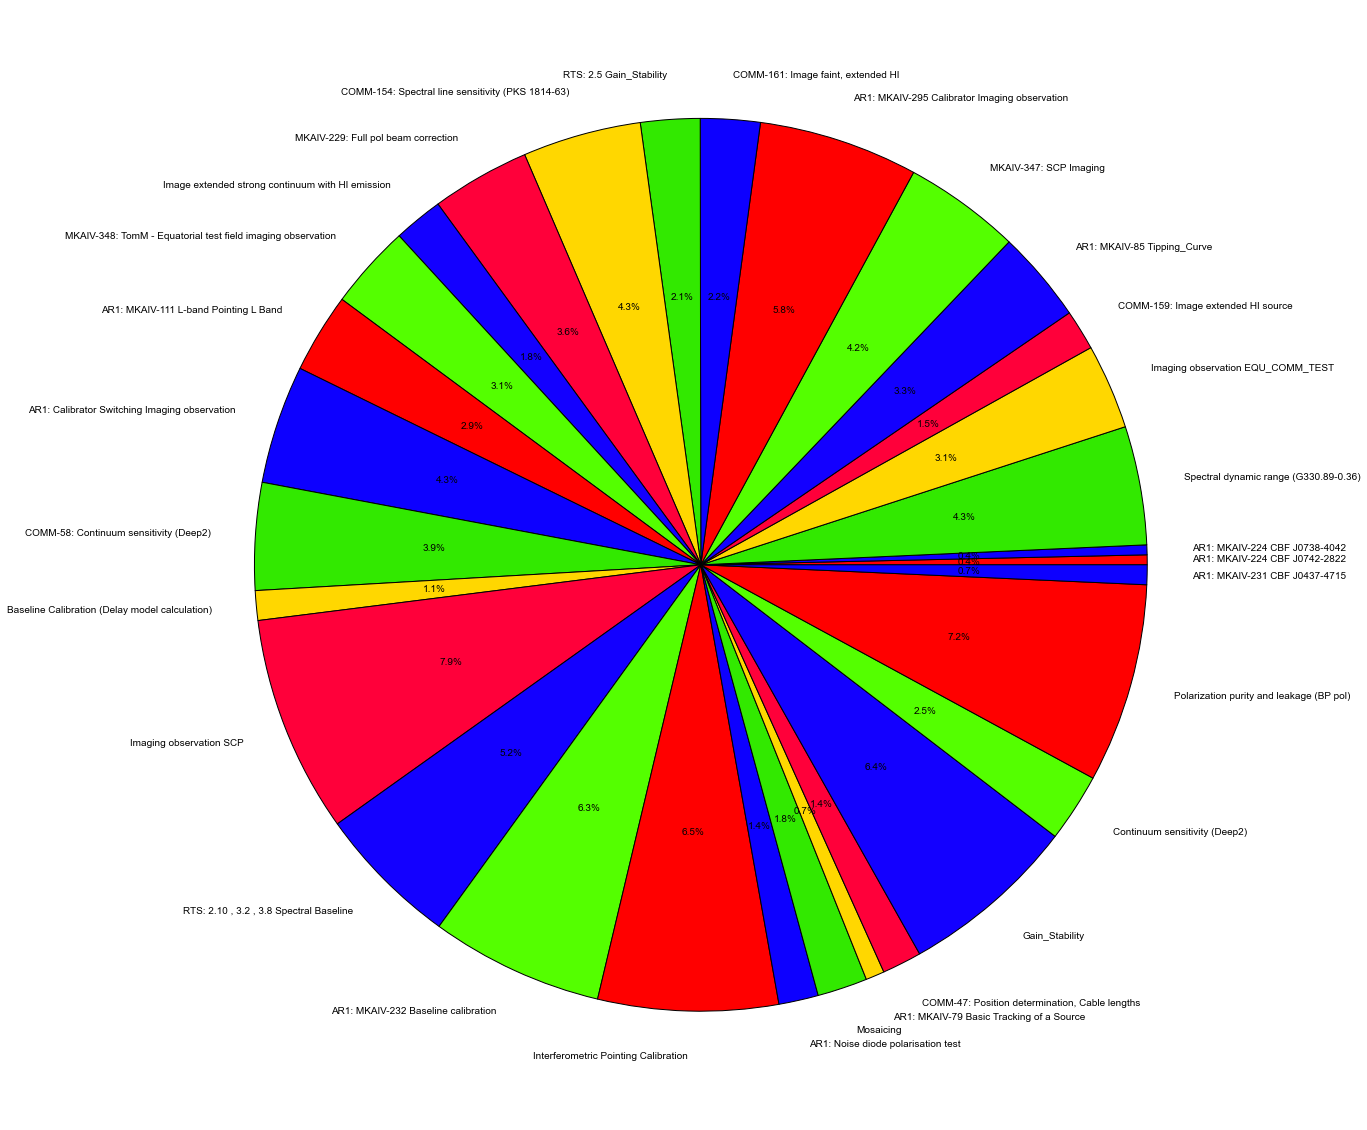

In [16]:
plt.figure(figsize=(20,20))
plt.pie(a_time,labels=a_id,colors=colors,autopct='%1.1f%%');

In [17]:
plt.show()